In [37]:
import glob
import numpy as np
import pandas as pd
files = glob.glob('../../data/house_55/status/*_appliance.npy')
files

['../../data/house_55/status/fridgeFreezer_appliance.npy']

In [38]:
main_data = pd.DataFrame()
for file in files:
    test=np.load(file, encoding = "latin1",allow_pickle=True) #加载文件
    testDf = pd.DataFrame(test)
    main_data = pd.concat([testDf,main_data])
main_data[1]=-main_data[1]
main_data = main_data.dropna()
main_data

,0,1,2
0,1420876740,-10,0
1,1420876740,0,2
2,1420876750,0,2
3,1420876750,-10,0
4,1420876760,0,2
...,...,...,...
3632524,1439190090,-10,0
3632525,1439190100,-110,1
3632526,1439190100,-10,0
3632527,1439190110,-110,1


In [39]:
main_data[0] = main_data[0].astype(int)
main_data.sort_values(by=0 , inplace=True, ascending=True)
main_data = main_data.reset_index()

main_data

,index,0,1,2
0,0,1420876740,-10,0
1,1,1420876740,0,2
2,2,1420876750,0,2
3,3,1420876750,-10,0
4,4,1420876760,0,2
...,...,...,...,...
3632524,3632524,1439190090,-10,0
3632525,3632525,1439190100,-110,1
3632526,3632526,1439190100,-10,0
3632527,3632527,1439190110,-110,1


In [40]:
main_data = main_data.drop(['index'],axis=1)
main_data

,0,1,2
0,1420876740,-10,0
1,1420876740,0,2
2,1420876750,0,2
3,1420876750,-10,0
4,1420876760,0,2
...,...,...,...
3632524,1439190090,-10,0
3632525,1439190100,-110,1
3632526,1439190100,-10,0
3632527,1439190110,-110,1


In [41]:
main_real=np.load('../../data/house_51/main.npy', encoding = "latin1",allow_pickle=True) #加载文件
main_51 = pd.DataFrame(main_real)
main_data=pd.concat([main_data,main_51])

In [42]:
main_data = main_data.groupby([0]).sum().reset_index()
main_data

,0,1,2
0,1.369177e+09,0.0,0.0
1,1.369177e+09,0.0,0.0
2,1.369177e+09,0.0,0.0
3,1.369177e+09,0.0,0.0
4,1.369177e+09,0.0,0.0
...,...,...,...
7138551,1.455397e+09,0.0,0.0
7138552,1.455397e+09,0.0,0.0
7138553,1.455397e+09,0.0,0.0
7138554,1.455397e+09,0.0,0.0


In [43]:
from os.path import join
folder='../../data/house_55'
np.save(join(folder, 'main.npy'), main_data)
print('finished!')

finished!


In [44]:
print(main_data[1].mean())
print(main_data[1].std())

22.95368423368637
219.98121263115974


In [35]:
test=np.load('../../data/house_51/CoffeeMaker_appliance.npy', encoding = "latin1",allow_pickle=True) #加载文件
test1 = pd.DataFrame(test)
# test = pd.DataFrame(test1)
test1

,0,1
0,1.404212e+09,0.333333
1,1.404212e+09,0.333333
2,1.404212e+09,0.666667
3,1.404212e+09,0.833333
4,1.404212e+09,0.666667
...,...,...
401033,1.408223e+09,1.000000
401034,1.408223e+09,1.000000
401035,1.408223e+09,0.500000
401036,1.408223e+09,0.500000


In [36]:
print(test1[1].mean())
print(test1[1].std())

2.0051538552690866
36.0333677137675


<AxesSubplot:>

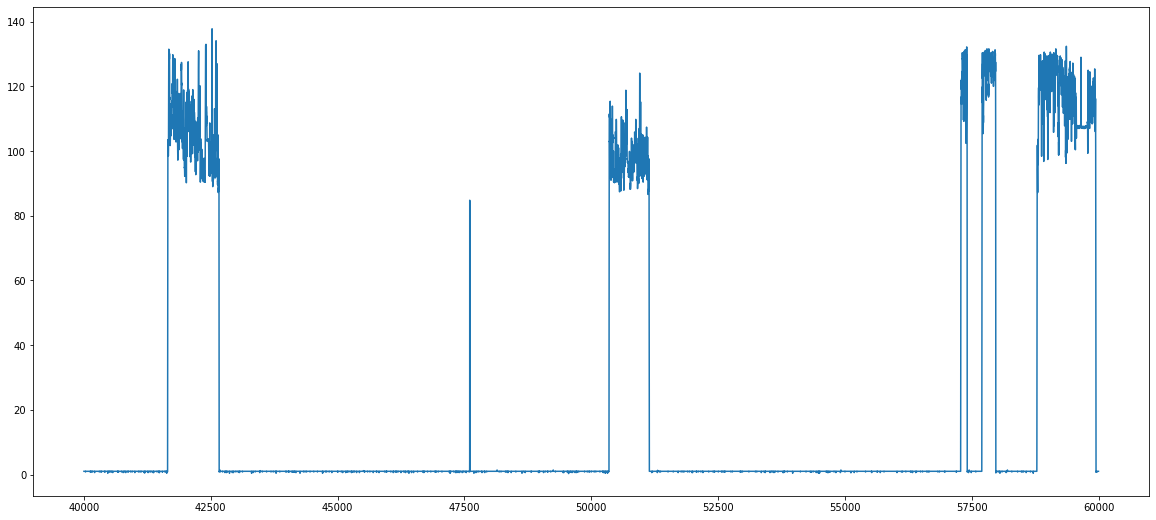

In [33]:
test1[1][40000:60000].plot(figsize=(20,9))